In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Exercício 1

Ambas funções $\texttt{func1}$ e $\texttt{func2}$ realizam a decomposição LU de um matriz quadrada A. A $\texttt{func1}$ é a implementação clássica desse algoritmo, sem otimizações ou pivoteamento, e funciona para matrizes genéricas desde que o elemento $a_{00}$ não seja muito próximo de zero. A $\texttt{func2}$ otimiza o algoritmo usada na $\texttt{func1}$ para matrizes banda, ou seja, matrizes onde é valido que $|i - j| > p \Rightarrow a_{ij} = 0$ para algum $p \in \mathbb{N}$.

O algoritmo usado em $\texttt{func1}$ é o seguinte:

* Inicializa-se a matriz L como a identidade e a U como uma cópia de A.
* Percorrme-se as colunas de L e a cada coluna $j \in [1, n]$ calculam-se os elementos $l_{ij}$ de L abaixo da diagonal principal, ou seja, com $i \in [j+1, n]$, de acordo com a fórmula $l_{ij} = u_{ij}/u_{jj}$.
* Após o cálculo de cada elemento $l_{ij}$, com $j$ e $i$ fixos, subtraí-se de cada elemento $u_{ik}$ de U, com $k \in [j, n]$, o valor de $l_{ij}u_{jk}$. Desse modo, ao final das iterações tem-se $u_{xy} = u_{xy} - \sum_{z=0}^{x-1} l_{xz}u_{zy}$.

A modificação feita para o algoritmo de $\texttt{func2}$ está no intervalo percorrido pelos valores $i$ e $k$, que deixam de ser $[j+1, n]$ e $[j, n]$ e passam a ser $[j+1, j+p]$ e $[j, j+p]$, onde $p$ é a largura de banda da matriz A. Desse modo, a complexidade da $\texttt{func1}$ é $O(n^3)$ e da $\texttt{func3}$ é $O(n\cdot p \cdot p)$.




In [ ]:
def func1(A) :
  """
  Realiza a decomposição LU em uma matriz quadrada arbitrária sem pivoteamento. Retorna uma tupla com as matrizes L e U.
  """

  # Calcula a dimensão de A e inicializa L e U.
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # Percorre todas as colunas de L.
  for j in range(n - 1):
    # Percorre as linhas de L abaixo da diagonal principal.
    for i in range(j + 1, n):
      # Calcula um elemento de L. Não será atualizado depois disso.
      L[i, j] = U[i, j] / U[j, j]
      # Atualiza uma linha de U com o novo elemento de L calculado.
      U[i, j : n] = U[i, j : n] - L[i, j] * U[j, j : n]

  return (L, U)

In [ ]:
def func2(A, p):
  """
  Realiza a decomposição LU em uma matriz quadrada de banda com largura p. Retorna uma tupla com as matrizes L e U.
  """

  # Calcula a dimensão de A e inicializa L e U.
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # Percorre todas as colunas de L.
  for j in range(n - 1):
    # Calcula o índice da linha do último elemento dentro da largura de banda.
    v = min(n, j + p + 1)
    # Percorre as linhas de L abaixo da diagonal principal e dentro da largura de banda.
    for i in range(j + 1, v):
      # Calcula um elemento de L. Não será atualizado depois disso.
      L[i, j] = U[i, j] / U[j, j]
      # Atualiza uma linha de U com o novo elemento de L calculado.
      U[i, j : v] = U[i, j : v] - L [i, j] * U[j, j : v]
  return (L, U)

Nos testes realizados, com $n=2000$ e $p=2$, o tempo de execução da $\texttt{func1}$ foi de 14.6057 segundos e da $\texttt{func2}$ foi de 0.0585 segundos, aproximadamente 249.67 vezes mais rápido. Desse modo, $\texttt{func2}$ é a melhor opção a ser utilizada com matrizes banda, porém, devido a não apresentar corritude para matrizes não banda, a $\texttt{func1}$ deve ser utilizada para esses casos.

In [ ]:
# Gerar uma matriz A nxn de banda p.
n = 2000
p = 2
A = np.zeros((n, n)) # A é inicializada com zeros.
for i in range(n):
  # Os valores fora da banda não são reatribuidos, continuam como zero.
  for j in range(max(0, i - p), min(n, i + p + 1)):
    A[i, j] = np.random.normal( )

# Mede o tempo de execução da decomposição LU com o algoritmo para matrizes arbitrárias.
start_time = time.time ()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

# Mede o tempo de execução da decomposição LU com o algoritmo otimizado para matrizes banda.
start_time = time.time()
(L_ , U_) = func2(A, p)
end_time = time.time()
print(end_time - start_time)

# Compara os resultados de ambos algoritmos.
print(np.linalg.norm(L @ U - A))
print(np.linalg.norm(L_ @ U_ - A))

16.14700961112976
0.04404592514038086
7.677748005658966e-13
7.677748005658966e-13


# Exercício 2

## Item a

As matrizes $A$ e $b$ do sistema $Ax = b$ estão declaradass abaixo.

In [ ]:
A = np.array([
    [4, -2,  1,  0,  0,  0],
    [-2, 7, -2,  1,  0,  0],
    [1, -2,  7, -2,  1,  0],
    [0,  1, -2,  7, -2,  1],
    [0,  0,  1, -2,  7, -2],
    [0,  0,  0,  1, -2,  4]
])

b = np.array([1, -2, 1, 1, -2, -1])

No método de Gauss-Jacobi temos que $C_J = \mathbb{I} - D^{-1}A$, onde $D$ é uma matriz diagonal formada pela diagonal da matriz $A$, e $g_J = D^{-1}b$.

In [ ]:
def Cg_gauss_jacobi(A, b):
  n = np.shape(A)[0]
  D = np.diag(np.diag(A))
  C = np.subtract(np.eye(n), np.matmul(np.linalg.inv(D), A))
  g = np.linalg.inv(D).dot(b)

  return C, g

C, g = Cg_gauss_jacobi(A, b)
print("Matriz C no método de Gauss-Jacobi:")
print(C)
print("Vetor g no método de Gauss-Jacobi:")
print(g)

Matriz C no método de Gauss-Jacobi:
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]
Vetor g no método de Gauss-Jacobi:
[ 0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


No método de Gauss-Seidel, temos $C_{GS} = -L^{-1}R$, onde $L$ é a matriz triangular inferior de $A$ e $R$ é a matriz triangular superior de A sem a diagonal, e $g_{GS} = L^{-1}b$

In [ ]:
def Cg_gauss_seidel(A, b):
  L = np.tril(A)
  R = np.triu(A, k=1)
  C = np.negative(np.matmul(np.linalg.inv(L), R))
  g = np.linalg.inv(L).dot(b)

  return C, g

C, g = Cg_gauss_seidel(A, b)
print("Matriz C no método de Gauss-Seidel:")
print(C)
print("Vetor g no método de Gauss-Seidel:")
print(g)

Matriz C no método de Gauss-Seidel:
[[-0.          0.5        -0.25       -0.         -0.         -0.        ]
 [-0.          0.14285714  0.21428571 -0.14285714 -0.         -0.        ]
 [-0.         -0.03061224  0.09693878  0.24489796 -0.14285714 -0.        ]
 [-0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [-0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [-0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]]
Vetor g no método de Gauss-Seidel:
[ 0.25       -0.21428571  0.04591837  0.18658892 -0.23896293 -0.4161287 ]


## Item b

O Método de Gauss-Jacobi converge para a solução de $Ax = b$, independentemente da escolha de $x^{(0)}$, se

\begin{equation}
\max_{1 \leq k \leq n} \left\{ \frac{\sum_{\substack{j=1 \\ j\neq k}}^{n} |a_{kj}|}{|a_{kk}|} \right\} < 1
\text{ ou }
\max_{1 \leq k \leq n} \left\{ \frac{\sum_{\substack{i=1 \\ i\neq k}}^{n} |a_{ik}|}{|a_{kk}|} \right\} < 1
\end{equation}

In [ ]:
def converge_j(A):
  # Primeira condição
  alpha_linha = np.zeros(A.shape[0])
  for k in range(A.shape[0]):
    for j in range(A.shape[1]):
      if(j != k):
        alpha_linha[k] += abs(A[k][j])
    alpha_linha[k] /= abs(A[k][k])

  # Segunda condições
  alpha_coluna = np.zeros(A.shape[0])
  for k in range(A.shape[0]):
    for i in range(A.shape[1]):
      if(i != k):
        alpha_coluna[k] += abs(A[i][k])
    alpha_coluna[k] /= abs(A[k][k])

  return max(alpha_linha) < 1 or max(alpha_coluna) < 1

Podemos verificar se o método de Gauss-Jacobi converge para a matriz $A$:

In [ ]:
if(converge_j(A)):
  print("O Método de Gauss-Jacobi converge.")
else:
  print("O Método de Gauss-Jacobi não converge.")

O Método de Gauss-Jacobi converge.


O Método de Gauss-Seidel converge para a solução de $Ax = b$, independentemente da escolha de $x^{(0)}$, se

\begin{equation}
\max_{1 \leq i \leq n} \{\beta_i \}< 1
\text{ com }
\beta_1 = \frac{\sum_{j=2}^{n} |a_{1j}|}{|a_{11}|}
\text{ e }
\beta_i = \frac{\sum_{j=1}^{i-1} |a_{ij}|\beta_j + \sum_{j=i+1}^{n} |a_{ij}|}{|a_{ii}|}
\end{equation}

In [ ]:
def converge_gs(A):
  beta = np.zeros(A.shape[0])

  # Calcula beta 1
  for i in range(1, A.shape[1]):
    beta[0] += abs(A[0][i])
  beta[0] /= abs(A[0][0])

  # Calcula beta i
  for i in range(1, A.shape[0]):
    for j in range(0, i):
      beta[i] += abs(A[i][j]) * beta[j]
    for j in range(i+1, A.shape[1]):
      beta[i] += abs(A[i][j])
    beta[i] /= abs(A[i][i])

  return max(beta) < 1

Podemos verificar se o método de Gauss-Seidel converge para a matriz $A$:

In [ ]:
if(converge_gs(A)):
  print("O Método de Gauss-Seidel converge.")
else:
  print("O Método de Gauss-Seidel não converge.")

O Método de Gauss-Seidel converge.


## Item c

As implementações dos métodos de Gauss-Jacobi e Gauss-Seidel são feitas abaixo, utilizando as funções definidas no item a para cálculo da matriz C e vetor g.

In [ ]:
def metodo_iterativo(C, g, chute_inicial, tolerancia):
  '''
  Executa as iterações de métodos iterativo para resolução de sistemas lineares.
  Recebe a matriz de iteração C e o vetor g.
  Retorna a solução aproximada, a série histórica dos erros absolutos e o número de iterações.
  '''

  x = chute_inicial # Solução aproximada
  k = 0 # Contador de iterações
  erro_absoluto = 1 # Erro absoluto da iteração
  erros = [] # Série histórica dos erros
  while(erro_absoluto > tolerancia):
    k += 1
    novo_x = np.add(C.dot(x), g) # Calcula o x da iteração
    erro_absoluto = abs(sum(x - novo_x)) # Calcula o erro absoluto da iteração
    erros.append(erro_absoluto) # Salva o histórico dos erros absolutos
    x = novo_x

  return x, erros, k

In [ ]:
def gauss_jacobi(A, b, chute_inicial, tolerancia):
  C, g = Cg_gauss_jacobi(A, b)
  return metodo_iterativo(C, g, chute_inicial, tolerancia)

In [ ]:
def gauss_seidel(A, b, chute_inicial, tolerancia):
  C, g = Cg_gauss_seidel(A, b)
  return metodo_iterativo(C, g, chute_inicial, tolerancia)

Abaixo as implementações são utilizadas para resolver o sistema com os dois métodos, usando chute inicial de $(1, 0, 0, 0, 0, 0)$ e tolerância de $10^{-8}$ para o erro absoluto. Percebe-se que o método de Gauss-Seidel convergiu para a solução em menos iterações (14 iterações) do que o método de Gauss-Jacobi (22 iterações).

In [ ]:
chute_inicial = (1, 0, 0, 0, 0, 0)
tolerancia = 1e-8
x_j, erros_j, k_j = gauss_jacobi(A, b, chute_inicial, tolerancia)
x_gs, erros_gs, k_gs = gauss_seidel(A, b, chute_inicial, tolerancia)

A solução encontrada pelo método de Gauss-Jacobi foi [ 0.08867463 -0.23782304  0.17195484  0.18202747 -0.3993451  -0.49575427], em 22 iterações.
A solução encontrada pelo método de Gauss-Seidel foi [ 0.08835206 -0.23750299  0.17158574  0.18239656 -0.39966515 -0.49543171], em 14 iterações.


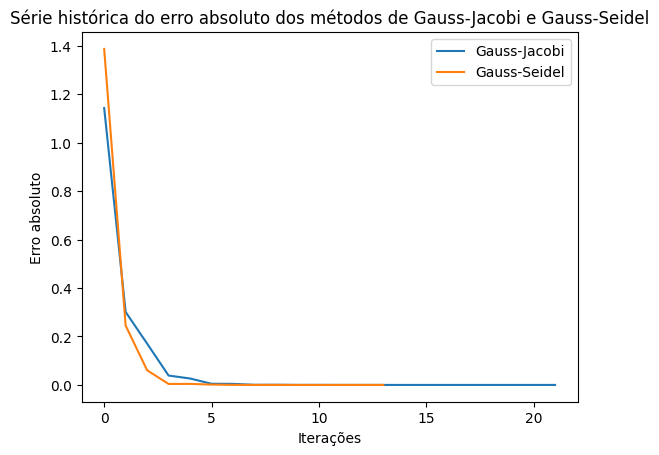

In [ ]:
print(f"A solução encontrada pelo método de Gauss-Jacobi foi {x_j}, em {k_j} iterações.")
print(f"A solução encontrada pelo método de Gauss-Seidel foi {x_gs}, em {k_gs} iterações.")

fig, ax = plt.subplots()
ax.plot(erros_j, label="Gauss-Jacobi")
ax.plot(erros_gs, label="Gauss-Seidel")
ax.set(xlabel='Iterações', ylabel='Erro absoluto',
       title='Série histórica do erro absoluto dos métodos de Gauss-Jacobi e Gauss-Seidel')
plt.legend()
plt.show()

# Exercício 3

## Item a

A altura onde ocorre o impacto é $p(x)$ tal que $x$ satisfaça $f(x) = p(x) - q(x) = 0$. Expandindo,

\begin{equation}
f(x) = -x^4 + 7.7x^3 - 18x^2 + 13.6x - (-x^2 + 5x + 0.75) = -x^4 + 7.7x^3 - 17x^2 + 8.6x - 0.75
\end{equation}

Portanto, é preciso calcular a raíz de uma função não linear $f(x): \mathbb{R} \rightarrow \mathbb{R}$ para encontrar a solução do problema.

In [ ]:
def p(x):
  return -(x**4) + 7.7*(x**3) - 18*(x**2) + 13.6*x

def q(x):
  return -(x**2) + 5*x + 0.75

def f(x):
  return p(x) - q(x)

Para tal, usaremos o método da bisseção:

In [ ]:
def bissecao(f, intervalo, precisao, iteracoes):
  '''
  Implementação do método da bisseção para cálculo de zero de funções.
  Recebe a função a ser analisada, o intervalo onde a solução será procurada, a precisão a ser utilizada e o número máximo de iterações.
  Retorna o zero da função aproximado.
  '''

  x = (intervalo[0] + intervalo[1])/2 # Cálculo do x inicial
  k = 0 # Contador de iterações
  while(abs(f(x))>precisao and k<=iteracoes):
    if(f(x)*f(intervalo[0])<0): # Se o zero da função está na primeira métade do intervalo atual
      intervalo[1] = x
    else: # Se o zero da função está na segunda métade do intervalo atual
      intervalo[0] = x
    x = (intervalo[0] + intervalo[1])/2
    k += 1

  return x

In [ ]:
precisao = 0.001
iteracoes = 5
x = bissecao(f, [2,3.85], precisao, iteracoes)
altura = p(x)
print(f"O método da bisseção encontrou a raíz {round(x, 4)}, que corresponde à altura {round(altura, 4)}.")

O método da bisseção encontrou a raíz 3.1707, que corresponde à altura 6.538.


## Item b

A altura onde ocorre o impacto é $p(x_1)$ tal que $x_1$ satisfaça $F(x_1, x_2) = (x_1 - x_2, p(x_1) - q(x_2)) = (0, 0)$. Expandindo,

\begin{equation}
F(x_1, x_2) = (x_1-x_2, -x_1^4 + 7.7x_1^3 - 18x_1^2 + 13.6x_1 + x_2^2 - 5x_2 - 0.75)
\end{equation}

Portanto, é preciso calcular a raíz de uma função não linear $F(x): \mathbb{R}^2 \rightarrow \mathbb{R}^2$ para encontrar a solução do problema.




In [ ]:
def F1(x1, x2):
  return x1-x2

def F2(x1, x2):
  return p(x1) - q(x2)

def F(x):
  return [F1(x[0], x[1]), F2(x[0], x[1])]

Para tal, usaremos o método de newton. Portanto é necessário calcular a matriz jacobiana de $F$.

\begin{equation}
J =
\begin{bmatrix}
\frac{dF_1}{dx_1} & \frac{dF_1}{dx_2} \\
\frac{dF_2}{dx_1} & \frac{dF_2}{dx_2}
\end{bmatrix}
=
\begin{bmatrix}
1 & -1 \\
-4x_1^3+23.1x_1^2 -36x_1+13.6 & 2x_2 -5
\end{bmatrix}
\end{equation}

In [ ]:
def F1_dx1(x1, x2):
  return 1

def F1_dx2(x1, x2):
  return -1

def F2_dx1(x1, x2):
  return -4*(x1**3) + 23.1*(x1**2) - 36*x1 + 13.6

def F2_dx2(x1, x2):
  return 2*x2 - 5

def J(x):
  return [[F1_dx1(x[0],x[1]), F1_dx2(x[0],x[1])],
          [F2_dx1(x[0],x[1]), F2_dx2(x[0],x[1])]]

In [ ]:
def newton(F, J, chute_incial, precisao):
  '''
  Implementação do método de Newton para cálculo de zero de funções.
  Recebe a função a ser analisada, a matriz jacobiana dessa função, o chute inicial, e a precisão a ser utilizada.
  Retorna o zero da função aproximado.
  '''

  x = chute_incial # Solução aproximada
  v = np.ones(len(x)) # Ajuste de x a acada iteração
  while(np.linalg.norm(v)>precisao):
    v = np.linalg.solve(J(x), F(x)) # Cálculo de v pela fórmula Jv=F
    x = x - v

  return x

In [ ]:
precisao = 0.001
chute_incial = [3.5,4.5]
x = newton(F, J, chute_incial, precisao)
altura = p(x[0])
print(f"O método de newton encontrou a raíz {round(x[0], 4)}, que corresponde à altura {round(altura, 4)}.")

O método de newton encontrou a raíz 3.1729, que corresponde à altura 6.5472.
